### Importação dos dados



In [223]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import folium
from folium.plugins import HeatMap

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)
loja.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [214]:
lojas = ['Loja1', 'Loja2', 'Loja3', 'Loja4']
dados_lojas = [loja, loja2, loja3, loja4]
#Aplicando list comprehension
faturamento = [round(float(dados['Preço'].sum()), 2) for dados in dados_lojas]
faturamento_lojas = tuple(zip(lojas, faturamento))
print(f'Faturamento das lojas: {faturamento_lojas}')

Faturamento das lojas: (('Loja1', 1534509.12), ('Loja2', 1488459.06), ('Loja3', 1464025.03), ('Loja4', 1384497.58))


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


##Gráfico de barras do faturamento das quatro lojas

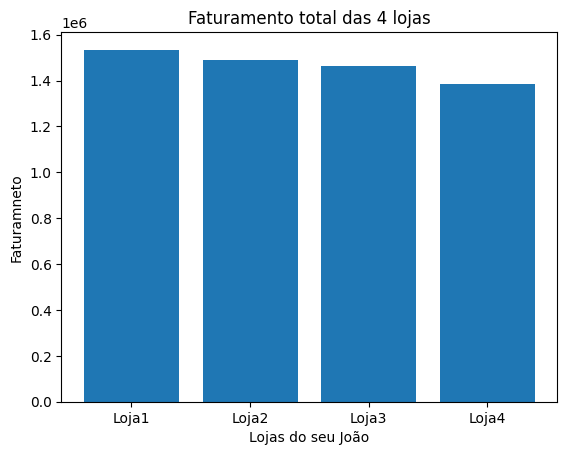

In [138]:
plt.bar(lojas, faturamento)
plt.ylabel('Faturamneto')
plt.xlabel('Lojas do seu João')
plt.title('Faturamento total das 4 lojas')
plt.show()

# 2. Vendas por Categoria


In [193]:
#a classe Counter da biblioteca colletions, vai contar quantas vezes cada elemento aparece em uma lista, tupla, etc
categoria_loja = [Counter(dados['Categoria do Produto']).most_common() for dados in dados_lojas]
for loja, dados in zip(lojas, categoria_loja):
  mais_vendido = dados[0]
  menos_vendido = dados[-1]
  total_categorias = len(dados)
  print(f'A categoria mais vendida da {loja} são  {mais_vendido} e as menos vendidas são {menos_vendido} de um total de {total_categorias} categorias')


A categoria mais vendida da Loja1 são  ('moveis', 465) e as menos vendidas são ('utilidades domesticas', 171) de um total de 8 categorias
A categoria mais vendida da Loja2 são  ('moveis', 442) e as menos vendidas são ('utilidades domesticas', 181) de um total de 8 categorias
A categoria mais vendida da Loja3 são  ('moveis', 499) e as menos vendidas são ('utilidades domesticas', 177) de um total de 8 categorias
A categoria mais vendida da Loja4 são  ('moveis', 480) e as menos vendidas são ('instrumentos musicais', 170) de um total de 8 categorias


# 3. Média de Avaliação das Lojas

Média de avaliação das lojas: (('Loja1', 3.98), ('Loja2', 4.04), ('Loja3', 4.05), ('Loja4', 4.0))


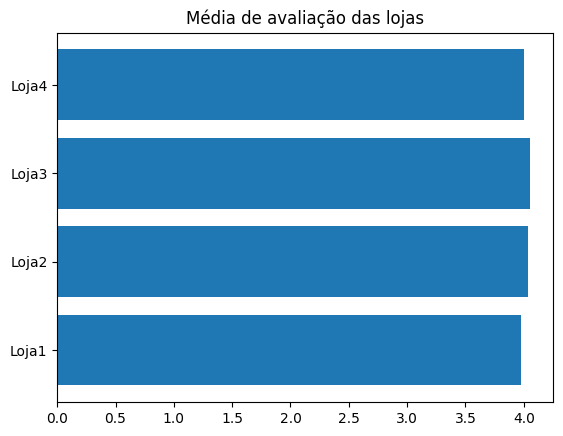

In [194]:
media_avaliacao = [round(float(dados['Avaliação da compra'].mean()), 2) for dados in dados_lojas]
media_avaliacao_lojas = tuple(zip(lojas, media_avaliacao))
print(f'Média de avaliação das lojas: {media_avaliacao_lojas}')
plt.barh(lojas, media_avaliacao)
plt.title('Média de avaliação das lojas')
plt.show()

##Gráfico de barras da média de avaliçoes das quatro lojas

# 4. Produtos Mais e Menos Vendidos

In [195]:
#o Counter cria um objeto, que é uma sub classe de um dicionário,  que contabiliza quantas vezes cada valor aparece
#O método most_common() retorna uma lista de tuplas, onde cada tupla contém um produto e sua respectiva contagem, ordenada pela frequência, da mais comum para a menos comum.
for loja, dados in zip(lojas, dados_lojas):
  produtos_loja = Counter(dados['Produto']).most_common()
  print(f'Os produtos vendidos pela {loja} com suas respectivas quantidades são {produtos_loja} ')

Os produtos vendidos pela Loja1 com suas respectivas quantidades são [('Micro-ondas', 60), ('TV Led UHD 4K', 60), ('Guarda roupas', 60), ('Secadora de roupas', 58), ('Blocos de montar', 56), ('Cômoda', 56), ('Bola de basquete', 55), ('Geladeira', 54), ('Bicicleta', 54), ('Copo térmico', 54), ('Impressora', 54), ('Bateria', 53), ('Carrinho controle remoto', 52), ('Faqueiro', 52), ('Modelagem preditiva', 51), ('Fone de ouvido', 50), ('Xadrez de madeira', 49), ('Celular Plus X42', 49), ('Lava louças', 48), ('Lavadora de roupas', 47), ('Guitarra', 47), ('Cadeira de escritório', 46), ('Sofá retrátil', 46), ('Violão', 46), ('Fogão', 45), ('Kit banquetas', 44), ('Cama box', 44), ('Cubo mágico 8x8', 44), ('Mesa de centro', 44), ('Cama king', 44), ('Smart TV', 44), ('Jogo de tabuleiro', 43), ('Jogo de panelas', 43), ('Smartwatch', 43), ('Bola de vôlei', 42), ('Dashboards com Power BI', 42), ('Tablet ABXY', 42), ('Jogo de copos', 41), ('Poltrona', 41), ('Iniciando em programação', 41), ('Assiste

# 5. Frete Médio por Loja


In [196]:
frete_medio = [round(float(dados['Frete'].mean()), 2) for dados in dados_lojas]
frete_lojas = tuple(zip(lojas, frete_medio))
print(f'O frete médio das lojas é {frete_lojas}')

O frete médio das lojas é (('Loja1', 34.69), ('Loja2', 33.62), ('Loja3', 33.07), ('Loja4', 31.28))


Text(0.5, 1.0, 'Percentual do frete médio pago por cada loja em relação ao frete médio total')

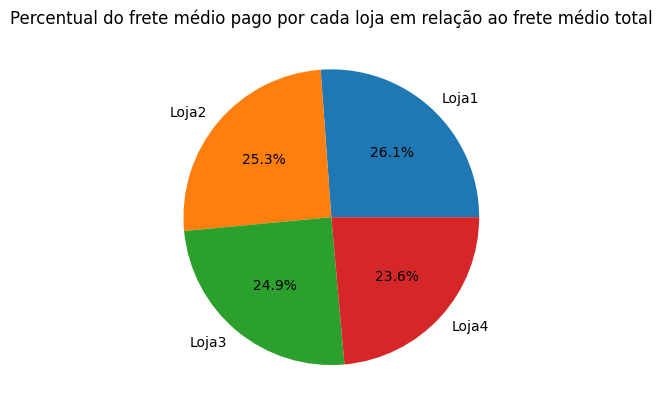

In [197]:
plt.pie(frete_medio, labels = lojas, autopct='%1.1f%%')
plt.title('Percentual do frete médio pago por cada loja em relação ao frete médio total')

#6. Análise descritiva dos dados obtidos

Com base nos dados fornecidos, foram desenvolvidas 5 métricas com o objetivo de escolher qual loja o Sr. João deveria manter. Além dessas métricas, foram criados 3 gráficos: um gráfico de barras com o faturamento médio de cada loja (Faturamento total das 4 lojas), um gráfico de colunas com a média de avaliação dos produtos de cada loja (Média de avaliação das lojas) e um gráfico de setores abordando o frete médio por venda de cada loja em comparação ao frete médio total pago por todas as lojas juntas (Percentual do frete médio pago por cada loja em relação ao frete médio total).

##Análise do Faturamento Médio
No gráfico Faturamento total das 4 lojas, percebe-se que as quatro lojas possuem um faturamento muito próximo. A Loja 1 apresenta o maior faturamento, com  1.534.509,12 reais , enquanto a Loja 4 apresenta o menor, com  1.384.497,58 reais.

##Análise da Categoria Mais Vendida
Ao analisar a categoria mais vendida em cada loja, percebe-se que os "Móveis" são os mais vendidos em todas. Já as "Utilidades domésticas" são as menos vendidas, com exceção da Loja 4, onde a categoria menos vendida é "Instrumentos musicais". Todas as lojas possuem a mesma quantidade de categorias disponíveis para venda.

##Análise da Média de Avaliações
Após verificar as médias de avaliações, conclui-se que todas as lojas possuem boas notas, girando em torno de 4. No gráfico Média de avaliação das lojas, percebe-se que a diferença entre elas é pequena, mas a Loja 1 tem a menor média (3,98), enquanto a Loja 4 se destaca positivamente com a melhor média (4,05).

##Análise dos Produtos Mais e Menos Vendidos
Loja 1: mais vendidos – Micro-ondas, TV LED UHD 4K, Guarda-roupas (60 unidades); menos vendido – Celular ABXY (33 unidades).

Loja 2: mais vendido – Iniciando em Programação (65 unidades); menos vendido – Jogo de tabuleiro (32 unidades).

Loja 3: mais vendido – Kit Banquetas (57 unidades); menos vendido – Blocos de Montar (35 unidades).

Loja 4: mais vendido – Cama Box (62 unidades); menos vendido – Guitarra (33 unidades).

##Análise do Frete Médio por Loja
Ao analisar o frete médio das lojas, percebe-se que todas possuem valores próximos. Porém, o gráfico Percentual do frete médio pago por cada loja em relação ao frete médio total destaca a Loja 1 como a que mais gasta com frete por venda, enquanto a Loja 4 é a que menos gasta.

##Conclusão
Se considerarmos apenas o faturamento, a Loja 1 parece ser a melhor opção, pois fatura mais. No entanto, ao observar outras métricas, nota-se que a situação muda. A Loja 1 tem a pior média de avaliação, o que indica experiências negativas por parte dos clientes. Isso pode afetar a fidelização e a atração de novos consumidores.Ela também é a loja com o maior custo médio de frete, o que compromete a margem de lucro – especialmente se esse custo não estiver sendo repassado ao cliente final.
Embora fature mais, a diversidade e quantidade de produtos vendidos são semelhantes às das outras lojas. Isso pode indicar que o faturamento elevado foi resultado de alguma queima de estoque ou descontos agressivos, não refletindo uma performance consistente. Logo a loja 1 é a que o senhor João deveria pensar em fechar.

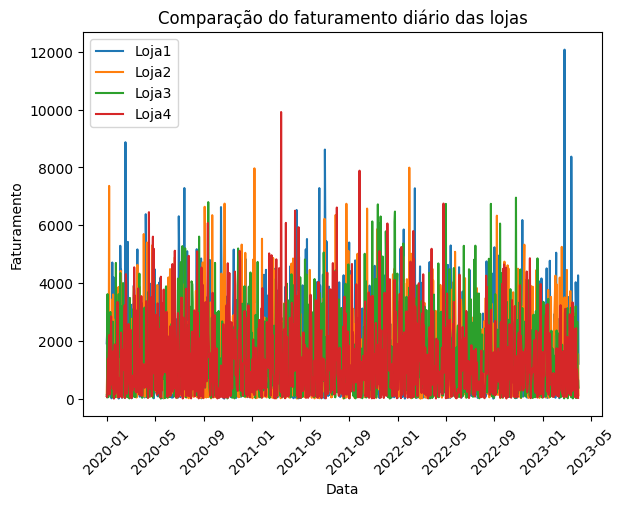

In [224]:
# Converte a coluna "Data da Compra" para datetime para que o pandas entenda como data
for dados in dados_lojas:
    dados['Data da Compra'] = pd.to_datetime(dados['Data da Compra'], dayfirst=True)

# Agrupa as vendas por data em cada loja e soma o valor total vendido naquele dia
vendas_por_dia_loja = [dados.groupby('Data da Compra')['Preço'].sum() for dados in dados_lojas]

# Plotando o gráfico de linhas para cada loja
for nome, vendas in zip(lojas, vendas_por_dia_loja):
    plt.plot(vendas.index, vendas.values, label=nome)

plt.xlabel('Data')
plt.ylabel('Faturamento')
plt.title('Comparação do faturamento diário das lojas')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45, fontsize=10)  # rotaciona e aumenta a fonte das datas
plt.show()

#baseado em https://www.datacamp.com/pt/tutorial/line-plots-in-matplotlib-with-python

Com base no gráfico mostrado, é possível perceber um aumento adrúpto das vendas da loja 1 entre Janeiro e Fevereiro de 2023, que pode ser decorrente de uma campanha promocional, se comparado com as demais lojas.

#Desafio Extra


In [243]:
# Convertemos as colunas  lat e lon para float
for dados in dados_lojas:
  dados['lat'] = dados['lat'].astype(float)
  dados['lon'] = dados['lon'].astype(float)

# Criando um mapa com as médias das longitudes e latitudes afim de melhor exibir os demais pontos.
media_lat = [dados['lat'].mean() for dados in dados_lojas]
media_lon = [dados['lon'].mean() for dados in dados_lojas]
heatmap_lojas = folium.Map(location=[(sum(media_lat)/len(media_lat)),(sum(media_lon)/len(media_lon))], zoom_start=4.2)

#Cria os grupos de dados que armazemnam os pontos de vendas das demais lojas.
for loja, coorden in zip(lojas, dados_lojas):
    grupo_lojas = folium.FeatureGroup(name=loja, show=False)
    HeatMap(coorden[['lat', 'lon']].values, radius=6).add_to(grupo_lojas)
    grupo_lojas.add_to(heatmap_lojas)

#Adiciona mais opções de visualização do mapa.
opcao_mapa = ['OpenStreetMap','Cartodb Positron', 'Cartodb dark_matter', 'OPNVKarte','CyclOSM' ]
for name in opcao_mapa:
  folium.TileLayer(name, control=True).add_to(heatmap_lojas)
folium.LayerControl().add_to(heatmap_lojas)

heatmap_lojas
#baseado no artigo 'Interesting Heatmaps Using Python Folium'  do Medium disponível em https://medium.com/%40vinodvidhole/interesting-heatmaps-using-python-folium-ee41b118a996
#Não sei se tem como mudar a cor da marca de calor

## Análise HeatMap

Com base no mapa, é possível perceber que:

- Todas as lojas apresentam uma maior presença no estado de São Paulo, o que é muito positivo, já que se trata de um estado com a maior concentração de renda do país.
- A Loja 1 possui forte presença tanto no Nordeste quanto no Sudeste, mas não apresenta nenhuma relevância no estado de Roraima.
- A Loja 2 tem uma presença semelhante à da Loja 1, com exceção do estado do Amapá, porém está presente em Roraima.
- A Loja 3 demonstra influência em todos os estados e pode ser considerada uma loja com alcance em todo o território nacional.
- A Loja 4 possui uma distribuição geográfica semelhante à da Loja 1. Isso levanta uma questão a respeito com o gasto médio do frete por produto já que é maior do que o da loja 4.

Com base nisso temos que a loja 3 é a melhor loja do sr João com a melhor logisica, pois possui a segunda menor média de frete por venda, está presente em todo território nacional e possui a melhor avaliação média. Por outro lado a loja 1 é a pior loja, por conta dá péssima me´dia de avaliação e não tem a melhor logistica já que tema mesma influência da loja 4 e mesmo assim tem o frete médio por venda maior.
